In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os, sys
sys.path.insert(0,'../scripts/')


In [3]:
df = pd.read_csv('../data/cleaned_telecom_data.csv')
df.head()

,MSISDN/Number,no.of xDR sessions,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),...,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,770.0,662.0,2019-04-04 12:01:18,2019-04-25 14:35:31,47.0,1823652.0,1.823653e+09,76411.0,...,1.570185e+12,1.785519e+13,2.924265e+14,1.805588e+14,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,235.0,606.0,2019-04-09 13:04:04,2019-04-25 08:15:48,70.0,1365104.0,1.365104e+09,3728.0,...,1.933278e+12,3.556554e+13,6.099208e+14,5.419594e+14,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,1.0,652.0,2019-04-09 17:42:11,2019-04-25 11:58:13,70.0,1361762.0,1.361763e+09,0.0,...,1.726277e+12,2.375120e+13,2.299803e+14,4.149084e+14,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,486.0,171.0,2019-04-10 00:31:25,2019-04-25 07:36:35,70.0,1321509.0,1.321510e+09,41212.0,...,6.574930e+11,1.509259e+13,8.103879e+14,7.618372e+14,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,565.0,954.0,2019-04-12 20:10:23,2019-04-25 10:40:32,70.0,1089009.0,1.089009e+09,0.0,...,9.127880e+11,1.753980e+13,5.312370e+14,5.646198e+14,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


# engagement metrics:
    
* sessions frequency
* the duration of the session
* the sessions total traffic (download and upload (bytes))

In [4]:
df['sessions frequency'] = df.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')
df_new = df[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]
df_new.head(10)

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
0,3.360100e+10,5.173738e+14,1823652.0,1
1,3.360100e+10,1.234090e+15,1365104.0,1
2,3.360100e+10,7.183836e+14,1361762.0,1
3,3.360101e+10,1.638393e+15,1321509.0,1
4,3.360101e+10,1.158391e+15,1089009.0,2
5,3.360101e+10,1.439738e+15,1074638.0,2
6,3.360101e+10,9.221408e+14,1035261.0,2
7,3.360101e+10,1.371765e+15,951292.0,1
8,3.360101e+10,1.076896e+15,941634.0,2
9,3.360102e+10,9.378444e+14,864482.0,1


In [5]:
df_new.describe()

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
count,1.068560e+05,1.068560e+05,1.068560e+05,106856.000000
mean,4.511474e+10,9.166177e+14,9.662336e+04,1.403768
std,2.889423e+12,3.445153e+14,8.395441e+04,0.815371
min,3.360100e+10,5.836229e+13,7.142000e+03,1.000000
25%,3.365088e+10,6.691826e+14,4.085950e+04,1.000000
50%,3.366365e+10,9.166781e+14,8.639900e+04,1.000000
75%,3.368344e+10,1.164285e+15,1.188535e+05,2.000000
max,8.823971e+14,1.780674e+15,1.823652e+06,18.000000


# ------------------------------------------------------------------------------------------------------------
* Aggregation of customer metrics per MSISDN
* Then top 10 customers per engagement metric is saved to a csv.

In [6]:
# Top 10 customers on session frequency
df_new.sort_values(by='sessions frequency', ascending=False, inplace=True, ignore_index=True)
TopSessionfrq = df_new[['MSISDN/Number', 'sessions frequency']].head(10)
TopSessionfrq

,MSISDN/Number,sessions frequency
0,3.362632e+10,18
1,3.361489e+10,17
2,3.362578e+10,17
3,3.365973e+10,16
4,3.367588e+10,15
5,3.376054e+10,15
6,3.366716e+10,13
7,3.362708e+10,12
8,3.360452e+10,12
9,3.378632e+10,12


In [7]:
TopSessionfrq.to_csv('../data/top10_users_sessionFrequency.csv')

In [8]:
# Top 10 customers by duration of session
df_new.sort_values(by='Dur. (ms)',ascending=False, inplace=True, ignore_index=True)
TopDuration = df_new[['MSISDN/Number', 'Dur. (ms)']].head(10)
TopDuration

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,1823652.0
1,3.376359e+10,1679813.0
2,3.376359e+10,1634983.0
3,3.376359e+10,1573420.0
4,3.365049e+10,1480875.0
5,3.365049e+10,1474663.0
6,3.365049e+10,1468680.0
7,3.366278e+10,1392232.0
8,3.366278e+10,1382408.0
9,3.366278e+10,1378034.0


In [9]:
TopDuration.to_csv('../data/top10_users_DurationOfSession.csv')

In [10]:
#Top 10 customers by Total Downloads and Uploads
df_new.sort_values(by='Total UL and DL', ascending=False, inplace=True, ignore_index=True)
TopDLUL = df_new[['MSISDN/Number', 'Total UL and DL']].head(10)
TopDLUL

,MSISDN/Number,Total UL and DL
0,3.366005e+10,1.780674e+15
1,3.376118e+10,1.772824e+15
2,3.366881e+10,1.771882e+15
3,3.365100e+10,1.769959e+15
4,3.378510e+10,1.769330e+15
5,3.366871e+10,1.765674e+15
6,3.362335e+10,1.764959e+15
7,3.360657e+10,1.762451e+15
8,3.376217e+10,1.761169e+15
9,3.369842e+10,1.760919e+15


In [11]:
TopDLUL.to_csv('../data/top10_users_DLUL.csv')

# Task 2.1, bullet two. Normalize each engagement metric

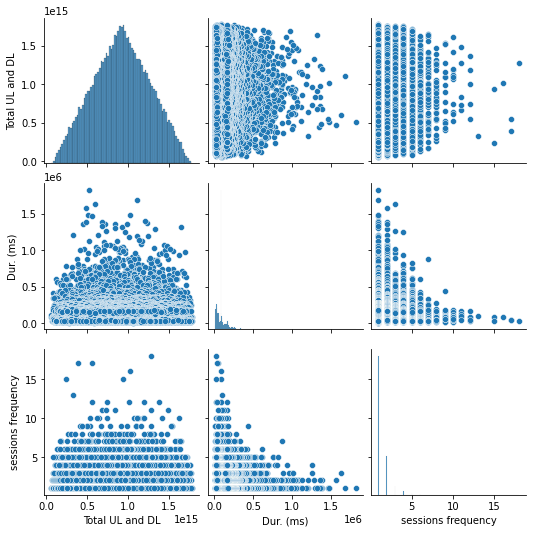

In [12]:
#before normalizing
g0 = sns.pairplot(df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']])

In [13]:
# description before normalizing
df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']].describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,1.068560e+05,1.068560e+05,106856.000000
mean,9.166177e+14,9.662336e+04,1.403768
std,3.445153e+14,8.395441e+04,0.815371
min,5.836229e+13,7.142000e+03,1.000000
25%,6.691826e+14,4.085950e+04,1.000000
50%,9.166781e+14,8.639900e+04,1.000000
75%,1.164285e+15,1.188535e+05,2.000000
max,1.780674e+15,1.823652e+06,18.000000


In [14]:
#normalize ULDL
normalize_column_df = pd.DataFrame(df['Total UL and DL'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['Total UL and DL'] = scaled_values

In [15]:
#normalize duration
normalize_column_df = pd.DataFrame(df['Dur. (ms)'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['Dur. (ms)'] = scaled_values

In [16]:
#normalize sessions frequency
normalize_column_df = pd.DataFrame(df['sessions frequency'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['sessions frequency'] = scaled_values

# 3*3 pair plots before and after normalizing depicted side by side

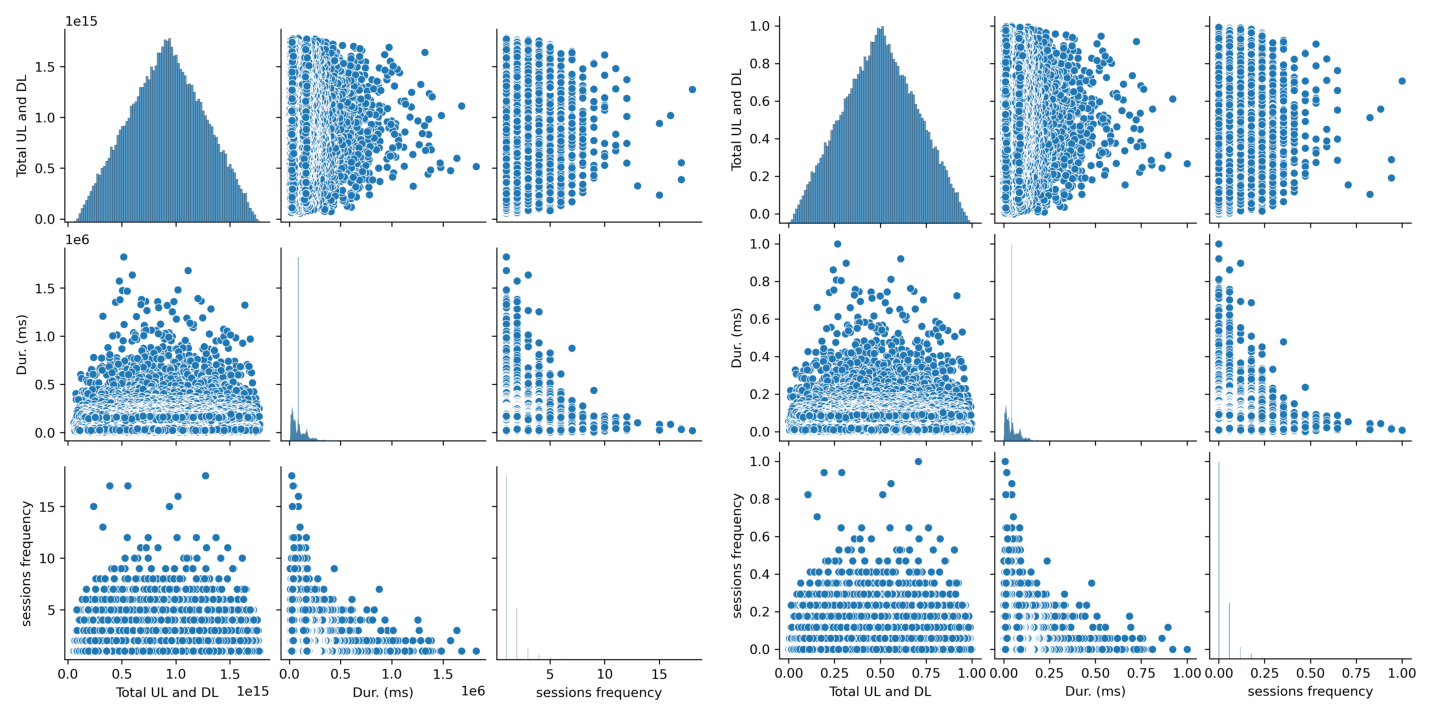

In [17]:
import matplotlib.image as mpimg

g1 = sns.pairplot(df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']])

############### 1. SAVE PLOTS IN MEMORY TEMPORALLY
g0.savefig('g0.png', dpi=300)
plt.close(g0.fig)

g1.savefig('g1.png', dpi=300)
plt.close(g1.fig)


############### 2. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(1, 2, figsize=(20, 20))

axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

In [18]:
df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']].describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,106856.000000,106856.000000,106856.000000
mean,0.498316,0.049260,0.023751
std,0.200031,0.046217,0.047963
min,0.000000,0.000000,0.000000
25%,0.354651,0.018562,0.000000
50%,0.498351,0.043631,0.000000
75%,0.642115,0.061498,0.058824
max,1.000000,1.000000,1.000000


# Standardizing selected columns
## *This is done to make the columns ready for clustering and the different results were saved to csv files. This files are later used to analyze user satisfaction.

In [52]:
df2 = pd.read_csv('../data/cleaned_telecom_data.csv')

df2['sessions frequency'] = df2.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')

df2_new = df2[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

standardized_df = pd.DataFrame(df2['Total UL and DL'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['Total UL and DL'] = std_data

standardized_df = pd.DataFrame(df2['Dur. (ms)'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['Dur. (ms)'] = std_data

standardized_df = pd.DataFrame(df2['sessions frequency'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['sessions frequency'] = std_data

df2_new = df2[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

df2_new.head()



,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
0,3.360100e+10,-1.158862,20.571127,-0.495197
1,3.360100e+10,0.921507,15.109232,-0.495197
2,3.360100e+10,-0.575403,15.069424,-0.495197
3,3.360101e+10,2.095055,14.589959,-0.495197
4,3.360101e+10,0.701781,11.820586,0.731244


In [53]:
df2_new.index = df2_new['MSISDN/Number']
df2_new = df2_new.iloc[:,1:4]

df2_new.head()

,Total UL and DL,Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-1.158862,20.571127,-0.495197
3.360100e+10,0.921507,15.109232,-0.495197
3.360100e+10,-0.575403,15.069424,-0.495197
3.360101e+10,2.095055,14.589959,-0.495197
3.360101e+10,0.701781,11.820586,0.731244


# K-means
* Run a k-means(k=3) to classify customers in 3 groups of engagement

In [22]:
df_nor = df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']]
df_nor.head(10)

,Total UL and DL,Dur. (ms),sessions frequency
0,0.266509,1.000000,0.000000
1,0.682645,0.747566,0.000000
2,0.383218,0.745727,0.000000
3,0.917389,0.723567,0.000000
4,0.638693,0.595574,0.058824
5,0.802047,0.587663,0.058824
6,0.501523,0.565986,0.058824
7,0.762581,0.519760,0.000000
8,0.591376,0.514444,0.058824
9,0.510640,0.471971,0.000000


In [23]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_nor)
label = kmeans.predict(df_nor)

df_kclus = pd.DataFrame(df_nor)
df_kclus['clusters'] = label

df_kclus.head()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
0,0.266509,1.000000,0.000000,0
1,0.682645,0.747566,0.000000,2
2,0.383218,0.745727,0.000000,1
3,0.917389,0.723567,0.000000,2
4,0.638693,0.595574,0.058824,2


In [24]:
centroids = kmeans.cluster_centers_
centroids

array([[0.25173308, 0.04920816, 0.02386597],
       [0.49612818, 0.0493878 , 0.02338102],
       [0.74112704, 0.04911554, 0.0242039 ]])

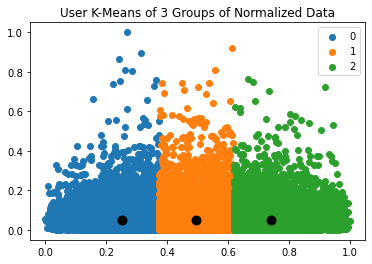

In [25]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

# plot
plt.title('User K-Means of 3 Groups of Normalized Data')
for i in u_labels:
    plt.scatter(df_nor[label == i].iloc[:,0] , df_nor[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

# min, max, avg and total non-normalized metrics

In [64]:
# forming cluster dataframe
cm = pd.DataFrame()
cm['index_d'] = df_nor.index.values
cm['cluster'] = kmeans.labels_

In [65]:
# cluster 1
nor_cluster1 = cm[cm.cluster == 0].iloc[:,0].values.tolist()
cluster_1_df = df_nor.loc[nor_cluster1,:]

# cluster 2
nor_cluster2 = cm[cm.cluster == 1].iloc[:,0].values.tolist()
cluster_2_df = df_nor.loc[nor_cluster2,:]

# cluster 3
nor_cluster3 = cm[cm.cluster == 2].iloc[:,0].values.tolist()
cluster_3_df = df_nor.loc[nor_cluster3,:]

In [66]:
# cluster 1; min, max and mean
cluster_1_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
count,2801.000000,2801.000000,2801.000000,2801.000000
mean,0.678897,0.141282,0.007749,1.676901
std,0.106434,0.025937,0.020510,0.467744
min,0.490083,0.092678,0.000000,1.000000
25%,0.593459,0.122349,0.000000,1.000000
50%,0.677743,0.136798,0.000000,2.000000
75%,0.751463,0.156278,0.000000,2.000000
max,0.982172,0.206104,0.117647,2.000000


In [67]:
# cluster 2; min, max and mean
cluster_2_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
count,10258.000000,10258.000000,10258.0,10258.000000
mean,0.747739,0.055371,0.0,1.986937
std,0.088326,0.017562,0.0,0.113550
min,0.603272,0.035448,0.0,1.000000
25%,0.674139,0.043631,0.0,2.000000
50%,0.735123,0.045202,0.0,2.000000
75%,0.811272,0.065304,0.0,2.000000
max,1.000000,0.136233,0.0,2.000000


In [68]:
# cluster 3; min, max and mean
cluster_3_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
count,8430.000000,8430.000000,8430.0,8430.0
mean,0.241979,0.016676,0.0,0.0
std,0.084297,0.009014,0.0,0.0
min,0.012695,0.000000,0.0,0.0
25%,0.180952,0.009385,0.0,0.0
50%,0.255866,0.015349,0.0,0.0
75%,0.313811,0.024228,0.0,0.0
max,0.370357,0.036925,0.0,0.0


* non-normalized metrics

In [69]:
df_beforN = pd.read_csv('../data/cleaned_telecom_data.csv')
df_beforN['sessions frequency'] = df_beforN.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')
df_Bnew = df_beforN[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']]
df_Bnew.head()

,Total UL and DL,Dur. (ms),sessions frequency
0,5.173738e+14,1823652.0,1
1,1.234090e+15,1365104.0,1
2,7.183836e+14,1361762.0,1
3,1.638393e+15,1321509.0,1
4,1.158391e+15,1089009.0,2


# Aggregation of user total traffic per application
* and saving each into a separate csv

In [26]:
df_agg = pd.read_csv('../data/cleaned_telecom_data.csv')
df_agg.head()

,MSISDN/Number,no.of xDR sessions,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),...,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,770.0,662.0,2019-04-04 12:01:18,2019-04-25 14:35:31,47.0,1823652.0,1.823653e+09,76411.0,...,1.570185e+12,1.785519e+13,2.924265e+14,1.805588e+14,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,235.0,606.0,2019-04-09 13:04:04,2019-04-25 08:15:48,70.0,1365104.0,1.365104e+09,3728.0,...,1.933278e+12,3.556554e+13,6.099208e+14,5.419594e+14,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,1.0,652.0,2019-04-09 17:42:11,2019-04-25 11:58:13,70.0,1361762.0,1.361763e+09,0.0,...,1.726277e+12,2.375120e+13,2.299803e+14,4.149084e+14,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,486.0,171.0,2019-04-10 00:31:25,2019-04-25 07:36:35,70.0,1321509.0,1.321510e+09,41212.0,...,6.574930e+11,1.509259e+13,8.103879e+14,7.618372e+14,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,565.0,954.0,2019-04-12 20:10:23,2019-04-25 10:40:32,70.0,1089009.0,1.089009e+09,0.0,...,9.127880e+11,1.753980e+13,5.312370e+14,5.646198e+14,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


# top 10 youtube users

In [27]:
# sort Youtube_total_data to get the most engaged users in the app
df_agg.sort_values(by=['Youtube_Total_Data'],ascending=False, inplace=True)
top10_youtube_user=df_agg[['MSISDN/Number', 'Youtube_Total_Data']].head(10)
top10_youtube_user.to_csv("../data/top10_youtube_users.csv",index=False)

top10_youtube_user

,MSISDN/Number,Youtube_Total_Data
66493,3.366762e+10,4.519008e+13
102091,3.376945e+10,4.517901e+13
15638,3.362999e+10,4.517004e+13
45398,3.366174e+10,4.510883e+13
13805,3.362673e+10,4.509337e+13
68228,3.366816e+10,4.509153e+13
95150,3.376148e+10,4.507447e+13
54943,3.366404e+10,4.507180e+13
18366,3.363651e+10,4.504979e+13
53530,3.366368e+10,4.504017e+13


# top 10 google users

In [29]:
# sort Google to get the most engaged users in the app
df_agg.sort_values(by=['Google_Total_Data'],ascending=False, inplace=True)
top10_google_user=df_agg[['MSISDN/Number', 'Google_Total_Data']].head(10)
top10_google_user.to_csv("../data/top10_google_users.csv",index=False)

top10_google_user

,MSISDN/Number,Google_Total_Data
92913,3.376053e+10,1.552878e+13
48780,3.366249e+10,1.551732e+13
80821,3.368482e+10,1.550857e+13
27384,3.365113e+10,1.550713e+13
3297,3.360993e+10,1.550645e+13
53075,3.366356e+10,1.550614e+13
82610,3.368841e+10,1.549392e+13
90229,3.369997e+10,1.548365e+13
16844,3.363264e+10,1.548131e+13
74104,3.367154e+10,1.547971e+13


# top 10 email users

In [30]:
# sort Email_total_data to get the most engaged users in the app
df_agg.sort_values(by=['Email_Total_Data'],ascending=False, inplace=True)
top10_email_user=df_agg[['MSISDN/Number', 'Email_Total_Data']].head(10)
top10_email_user.to_csv("../data/top10_email_users.csv",index=False)

top10_email_user

,MSISDN/Number,Email_Total_Data
43873,3.366137e+10,4.518036e+12
88190,3.369935e+10,4.513579e+12
14756,3.362843e+10,4.513000e+12
57130,3.366468e+10,4.512730e+12
28657,3.365267e+10,4.510915e+12
103717,3.378103e+10,4.510178e+12
79122,3.368142e+10,4.507049e+12
44304,3.366147e+10,4.504056e+12
100124,3.376363e+10,4.502041e+12
38551,3.366009e+10,4.499429e+12


# Top 10 social media users

In [32]:
# sort social media to get the most engaged users in the app
df_agg.sort_values(by=['Social_Media_Total_Data'],ascending=False, inplace=True)
top10_socialM_user=df_agg[['MSISDN/Number', 'Social_Media_Total_Data']].head(10)
top10_socialM_user.to_csv("../data/top10_socialMedia_users.csv",index=False)

top10_socialM_user

,MSISDN/Number,Social_Media_Total_Data
32217,3.365869e+10,3.650861e+12
105238,3.378317e+10,3.650240e+12
50251,3.366283e+10,3.648729e+12
98107,3.376261e+10,3.648659e+12
31907,3.365863e+10,3.648092e+12
45504,3.366176e+10,3.648027e+12
11151,3.362249e+10,3.647700e+12
9945,3.362060e+10,3.647486e+12
7417,3.361647e+10,3.647484e+12
74797,3.367289e+10,3.646924e+12


# Top 10 netflix users

In [33]:
# sort netflix to get the most engaged users in the app
df_agg.sort_values(by=['Netflix_Total_Data'],ascending=False, inplace=True)
top10_netflix_user=df_agg[['MSISDN/Number', 'Netflix_Total_Data']].head(10)
top10_netflix_user.to_csv("../data/top10_netflix_users.csv",index=False)

top10_netflix_user

,MSISDN/Number,Netflix_Total_Data
60136,3.366548e+10,4.519815e+13
38586,3.366009e+10,4.511036e+13
25959,3.365071e+10,4.506474e+13
72644,3.366965e+10,4.505436e+13
56035,3.366436e+10,4.501295e+13
54868,3.366402e+10,4.499895e+13
18413,3.363673e+10,4.498365e+13
86468,3.369879e+10,4.497063e+13
27100,3.365096e+10,4.491554e+13
5081,3.361276e+10,4.490332e+13


# Top 10 game users

In [34]:
# sort gameers to get the most engaged users in the app
df_agg.sort_values(by=['Gaming_Total_Data'],ascending=False, inplace=True)
top10_game_user=df_agg[['MSISDN/Number', 'Gaming_Total_Data']].head(10)
top10_game_user.to_csv("../data/top10_gameApp_users.csv",index=False)

top10_game_user

,MSISDN/Number,Gaming_Total_Data
82105,3.368740e+10,8.592028e+14
76363,3.367588e+10,8.590109e+14
2886,3.360923e+10,8.589021e+14
44290,3.366146e+10,8.587352e+14
66388,3.366759e+10,8.586528e+14
11706,3.362335e+10,8.585627e+14
28398,3.365229e+10,8.585064e+14
71916,3.366938e+10,8.583671e+14
28019,3.365182e+10,8.581997e+14
46343,3.366194e+10,8.581537e+14


# top 10 other data users

In [35]:
# sort other data users to get the most engaged users in the app
df_agg.sort_values(by=['Other_Total_Data'],ascending=False, inplace=True)
top10_other_user=df_agg[['MSISDN/Number', 'Other_Total_Data']].head(10)
top10_other_user.to_csv("../data/top10_otherAct_users.csv",index=False)

top10_other_user

,MSISDN/Number,Other_Total_Data
104253,3.378177e+10,8.595209e+14
86643,3.369884e+10,8.594856e+14
102717,3.377080e+10,8.592853e+14
87257,3.369904e+10,8.591889e+14
36065,3.365950e+10,8.590537e+14
24097,3.365028e+10,8.589266e+14
97609,3.376235e+10,8.588747e+14
83452,3.369512e+10,8.588496e+14
18393,3.363660e+10,8.587877e+14
49947,3.366277e+10,8.585556e+14


# Top 3 most used apps drawn in a piechart

In [36]:
apps=df_agg[['Youtube_Total_Data','Google_Total_Data','Email_Total_Data',
                'Social_Media_Total_Data','Netflix_Total_Data','Gaming_Total_Data', 'Other_Total_Data']]

apps.head()

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data
104253,3.073834e+13,3.800935e+12,2.619031e+12,2.213932e+12,1.604209e+13,6.929330e+14,8.595209e+14
86643,2.663447e+13,8.470152e+12,3.407370e+12,7.157290e+11,1.985751e+13,1.122402e+14,8.594856e+14
102717,1.212793e+13,2.532434e+12,3.111951e+12,9.862130e+11,3.718895e+13,8.106923e+14,8.592853e+14
87257,2.816599e+13,7.301393e+12,2.745798e+12,3.613850e+11,1.860784e+13,3.685137e+13,8.591889e+14
36065,1.428620e+13,1.020697e+13,1.550181e+12,1.661635e+12,1.313536e+13,8.146938e+14,8.590537e+14


In [37]:
# sum of column values to get total data used
sum_column = apps.sum(axis=0)

df_app = pd.DataFrame({'Application':sum_column.index, 'Total Data used':sum_column.values})
df_app.sort_values(by=['Total Data used'],ascending=False, inplace=True)
df_apps = df_app.head(4)

df_apps

,Application,Total Data used
5,Gaming_Total_Data,4.602173e+19
6,Other_Total_Data,4.581798e+19
4,Netflix_Total_Data,2.419100e+18
0,Youtube_Total_Data,2.416475e+18


* Drop other total data to get 3 distnict and known most used apps

In [38]:
i = df_apps[df_apps['Application'] == 'Other_Total_Data'].index
df_apps.drop(i, inplace=True)
df_apps

,Application,Total Data used
5,Gaming_Total_Data,4.602173e+19
4,Netflix_Total_Data,2.419100e+18
0,Youtube_Total_Data,2.416475e+18


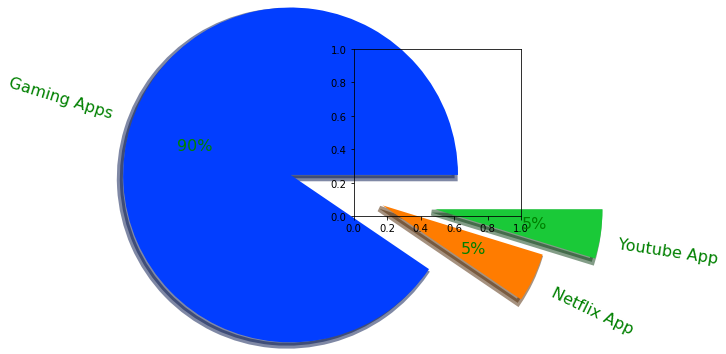

In [42]:
#plot it in a piechart
data = df_apps['Total Data used'].tolist()
explode = [0.5,0.08,0.39]
labels = ['Gaming Apps', 'Netflix App', 'Youtube App']
colors = sns.color_palette('bright')
plt.figure(figsize=(3,5))
plt.pie(data,
        labels=labels,
        colors = colors,
        autopct = '%0.0f%%',
        explode = explode,
        shadow = 'True',
        startangle = 0,
        textprops = {'color': 'Green','fontsize':16},
        wedgeprops = {'linewidth': 6},
        frame = 'true' ,
        center = (0.1,0.1),
        rotatelabels = 'true')
plt.show()

# Top 3 mostly used apps are
* Gaming apps
* Youtube and netflix apps.
* The gaming apps take a very significant portion.

# K-means for stanardized data


In [55]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df2_new)
    sse.append(kmeans.inertia_)

In [56]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

6

In [57]:
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(df2_new)
centroids = kmeans.cluster_centers_
#Getting index based on clusters
u_labels = np.unique(label)

df2_new['cluster'] = label
### save standardized engagement
df2_new.to_csv('../data/std_engagement.csv')

In [58]:
df2_new.head()

,Total UL and DL,Dur. (ms),sessions frequency,cluster
MSISDN/Number,,,,
3.360100e+10,-1.158862,20.571127,-0.495197,0
3.360100e+10,0.921507,15.109232,-0.495197,0
3.360100e+10,-0.575403,15.069424,-0.495197,0
3.360101e+10,2.095055,14.589959,-0.495197,0
3.360101e+10,0.701781,11.820586,0.731244,0


In [60]:
centroids

array([[-1.67787981e-02,  5.42654007e+00,  4.66243313e-02],
       [ 1.01221378e-02, -5.01147151e-02,  2.80773392e+00],
       [ 1.25580208e+00, -2.40627387e-01, -2.18186597e-01],
       [-3.39056433e-03, -4.16836898e-01, -2.32633730e-01],
       [-1.23562417e-02,  1.33107749e+00, -2.10421407e-01],
       [-1.26744488e+00, -2.54945238e-01, -2.20096025e-01]])

In [61]:
centroids_df = pd.DataFrame(centroids, columns=['Total UL and DL', 'Dur. (ms)','sessions frequency'])
centroids_df.to_csv('../data/centero_engagment.csv')

In [62]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df2_new)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

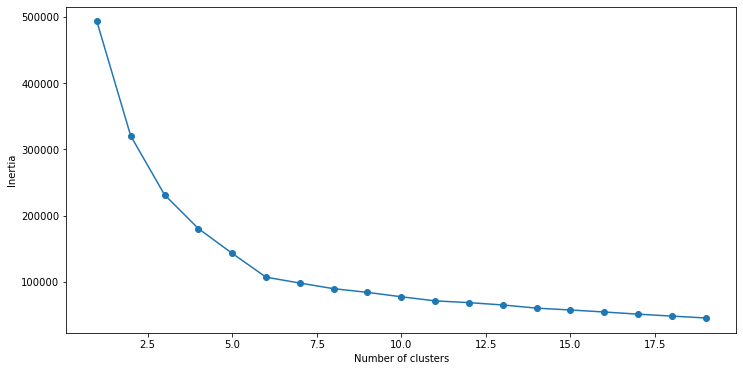

In [63]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')